In [17]:
# Description;
#Creating a Machine Learning model using K-Nearest Neighbor with hyperparameter optimization
#data set URL: https://archive.ics.uci.edu/ml/datasets/automobile



In [18]:
import pandas as pd
import numpy as np

In [19]:
#Data cleaning
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('imports-85.data', names=columns)


df[columns] = df[columns].replace('?', np.nan)
cols_to_numeric = ['normalized-losses','price']
df[cols_to_numeric] =df[cols_to_numeric].apply(pd.to_numeric)

#Finding columns that are numeric values 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_clean = df.select_dtypes(include=numerics)


In [20]:
# Return number of rows that have a missing value for the entire clean database
nrow_isnan =df_clean.isnull().any(axis=1).sum()

#nrow_isnan = 41
#total number of rows in the df_clean = 205
#--------------
#Return number of rows that have a missing value in normalized-loss colmn
nrow_isnan_noramlized_losses = df_clean['normalized-losses'].isnull().sum()
#nrow_isnan_noramlized_losses = 41
# df_clean.isnull().sum()
#price column also has 4 NaN values
#since total rows are 205, dropping 41 rows will make a huge difference, 
#therefore, we will replace the missing values from this colume with the average value fo the column
df_clean = df_clean.fillna(df_clean.mean())

#Normalizing the columns for training so that all values range from 0 to 1
# to normalize, we will subtract the mean from each value and devide by standard deviation 
# except for the price column. 
#first drop the price column 
df_normalized = df_clean.copy().drop(['price'], axis=1)
# normalizing the dataframe
df_normalized = (df_normalized-df_normalized.mean())/df_normalized.std()
#adding price column back into the normalized dataframe
df_normalized['price'] = df_clean['price']


In [21]:
df_normalized.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg,price
0,1.739213,0.000000,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,-0.287645,-0.644974,-0.544725,13495.0
1,1.739213,0.000000,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,-0.287645,-0.644974,-0.544725,16500.0
2,0.133183,0.000000,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-0.287645,-0.950684,-0.689938,16500.0
3,0.936198,1.325715,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.035885,-0.186409,-0.109087,13950.0
4,0.936198,1.325715,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.539405,-1.103540,-1.270789,17450.0


In [22]:
#Excersize 3
#----------------Univariate k-nearest neighbor model -----------
#using the default k value and algorithm = auto
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    #splitting the dataframe into two dataframes
    # the first 70% will be training set, 
    # the second 30% will be test set 
    train_set = df.loc[:round(len(df_normalized)*0.7)]
    test_set = df.loc[round(len(df_normalized)*0.7)+1:]
    train_feature = train_set[train_col]
    train_target = train_set[target_col]  
    prediction_col = test_set[train_col]
    true_values = test_set[target_col]
    
    #setting up K-nearest neighbor univariet model
    knn = KNeighborsRegressor()
    knn.fit(train_feature, train_target)
    predictions = knn.predict(prediction_col)
    mse = mean_squared_error(predictions, true_values)
    rmse = np.sqrt(mse)
    
    return rmse
# using the function above to train and test univariate models using different 
#numeric columns in the data set. 
cols = list(df_normalized.columns)
cols.remove('price')
rmses={}

for i in cols:
    rmses[i]=knn_train_test(train_col = [i], target_col='price', df = df_normalized)
    
#-------The results --- seems like curb-weight is brest using the default K value
    
# {'city-mpg': 3477.5053353893472,
#  'compression-rate': 7588.741151351573,
#  'curb-weight': 2475.8531438473847,
#  'engine-size': 3386.337002090477,
#  'height': 7038.383703662819,
#  'highway-mpg': 2853.414070527317,
#  'length': 6410.232629291892,
#  'normalized-losses': 10326.024882434996,
#  'symboling': 6932.658236302646,
#  'wheel-base': 5850.562340310655,
#  'width': 4393.506012410367}




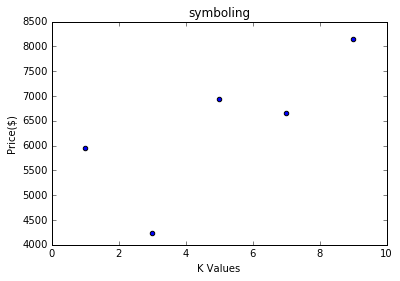

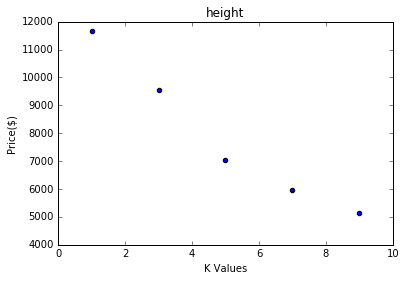

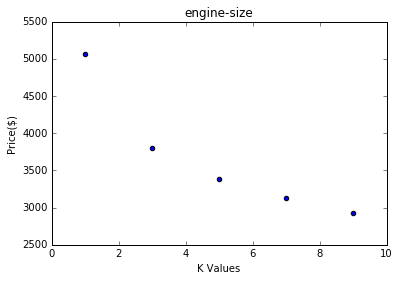

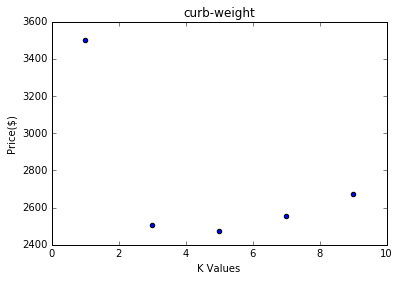

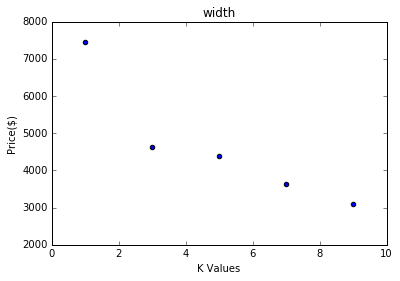

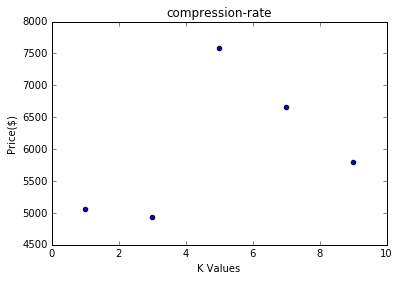

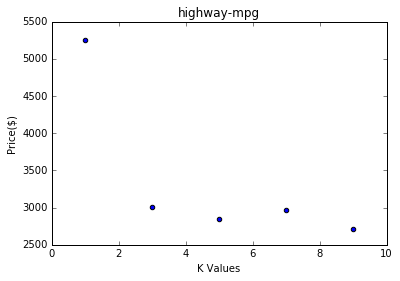

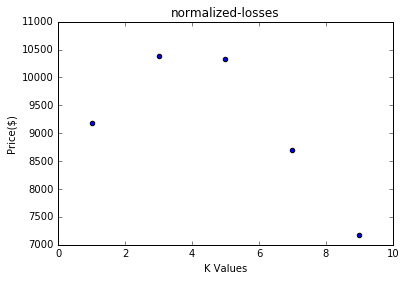

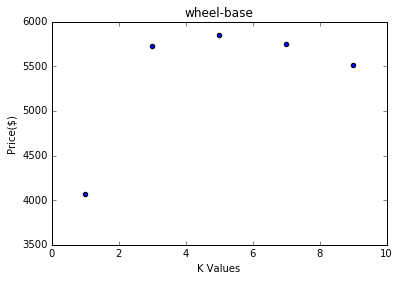

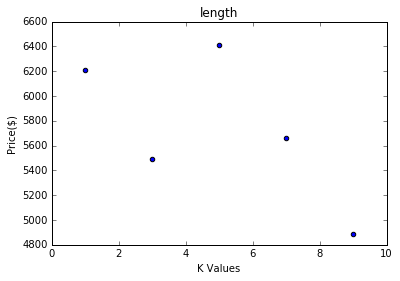

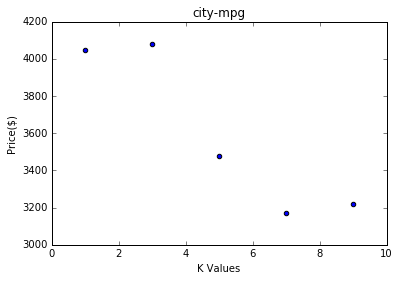

In [55]:
#---------multivariate function ------
# this accepts different K values 



def knn_train_test(train_col, target_col, df, k_value):
    #splitting the dataframe into two dataframes
    # the first 70% will be training set, 
    # the second 30% will be test set 
    train_set = df.loc[:round(len(df_normalized)*0.7)]
    test_set = df.loc[round(len(df_normalized)*0.7)+1:]
    train_feature = train_set[train_col]
    train_target = train_set[target_col]  
    prediction_col = test_set[train_col]
    true_values = test_set[target_col]
    
    #setting up K-nearest neighbor univariet model
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(train_feature, train_target)
    predictions = knn.predict(prediction_col)
    mse = mean_squared_error(predictions, true_values)
    rmse = np.sqrt(mse)
    
    return rmse
# using the function above to train and test univariate models using different 
#numeric columns in the data set. 
cols = list(df_normalized.columns)
cols.remove('price')

#we can use this section  to create a dictionary of key values 
#where column name is key and values are RMSE at K = 1,3,5,7 and 9
#-------------------code-----------
# rmses={}
# for i in cols:
#     rmses[i]=knn_train_test(train_col = [i], target_col='price', df = df_normalized, k_value =9)
    
#--------------------end of code ---------

#this code generates a scatter plot of univariet model of each numeric column
#at all the different k values of k = 1,3,5,7
import matplotlib.pyplot as plt
%matplotlib inline  
# i = 'symboling'
k_vals = [1,3,5,7,9]
rmses_dict ={}
for i in cols: 
    rmses =[]
    for k in k_vals: 
        rmse =knn_train_test(train_col = [i], target_col='price', df = df_normalized, k_value =k)
        rmses.append(rmse)
    rmses_dict[i] = rmses
for key, value in rmses_dict.items(): 
    plt.figure(key)
    plt.title(key)
    plt.xlabel('K Values')
    plt.ylabel('Price($)')
    xs = k_vals
    ys = value
    plt.scatter(xs,ys)
    plt.show()
    


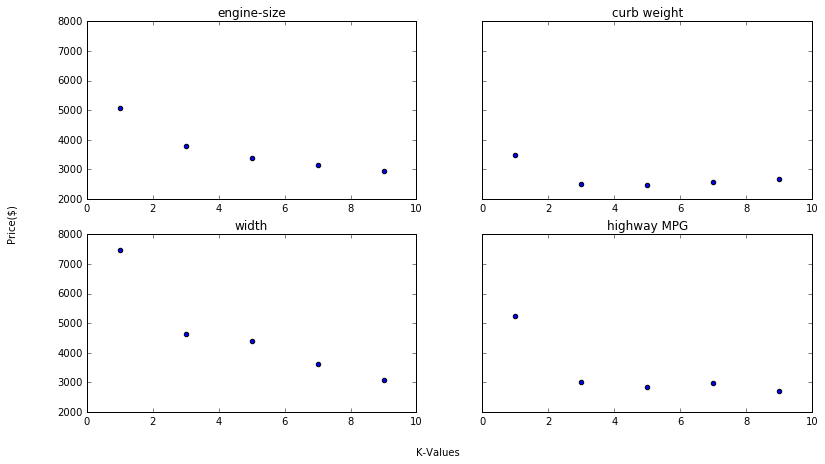

In [90]:
#from the plots, it seems like Engine Size, Curb Weight, Highway MPG
# are good indicators giving the lowest root mean squared error 
# for different K-values
x = k_vals
fig, axes = plt.subplots(2,2, sharey=True, figsize=(13,7))
fig.text(0.5, 0.04, 'K-Values', ha='center')
fig.text(0.04, 0.5, 'Price($)', va='center', rotation='vertical')
axes[0,0].scatter(x, y=rmses_dict['engine-size'])
axes[0,0].title.set_text('engine-size')
axes[0,1].scatter(x, y=rmses_dict['curb-weight'])
axes[0,1].title.set_text('curb weight')
axes[1,0].scatter(x, y=rmses_dict['width'])
axes[1,0].title.set_text('width')
axes[1,1].scatter(x, y=rmses_dict['highway-mpg'])
axes[1,1].title.set_text('highway MPG')

In [115]:
#excersize 4
#modifying knn_train function to work with multiple columns - 
#this accepts a list of column names, using default k-value will return 
#mean squared error

def multiv_knn_train_test(train_cols, target_col, df):
    #splitting the dataframe into two dataframes
    # the first 70% will be training set, 
    # the second 30% will be test set 
    train_set = df.loc[:round(len(df_normalized)*0.7)]
    test_set = df.loc[round(len(df_normalized)*0.7)+1:]
    rmses = []
    train_target = train_set[target_col]
    true_values = test_set[target_col]
    for i in train_cols:

        train_feature = train_set[[i]]
        prediction_col = test_set[[i]]
        knn = KNeighborsRegressor()
        knn.fit(train_feature, train_target)
        predictions = knn.predict(prediction_col)
        mse = mean_squared_error(predictions, true_values)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    
    return np.mean(rmses)




In [116]:
#testing for the best 2 features with default k value
train_columns_2 = ['engine-size','highway-mpg']   
two_feature = multiv_knn_train_test(train_cols =train_columns_2 , target_col='price', df = df_normalized)
two_feature

3119.875536308897

In [117]:
#testing for the best 3 features with default k value
train_columns_3 = ['engine-size','highway-mpg','curb-weight']   
three_feature = multiv_knn_train_test(train_cols =train_columns_3 , target_col='price', df = df_normalized)
three_feature

2905.201405488393

In [118]:
#testing for the best 4 features with default k value
train_columns_4 = ['engine-size','highway-mpg','curb-weight', 'width']   
four_feature = multiv_knn_train_test(train_cols =train_columns_4 , target_col='price', df = df_normalized)
four_feature

3277.2775572188866

In [119]:
#testing for the best 5 features with default k value
train_columns_5 = ['engine-size','highway-mpg','curb-weight', 'width', 'city-mpg']   
five_feature = multiv_knn_train_test(train_cols =train_columns_5 , target_col='price', df = df_normalized)
five_feature

3317.323112852979

In [122]:
# the best model is training with 3 features - 
# to optimize, we use hyperparameter value where k=[1,2,....,25]
def hyperparm_knn_train_test(train_cols, target_col, df, k_value):
    #splitting the dataframe into two dataframes
    # the first 70% will be training set, 
    # the second 30% will be test set 
    train_set = df.loc[:round(len(df_normalized)*0.7)]
    test_set = df.loc[round(len(df_normalized)*0.7)+1:]
    rmses=[]
    train_target = train_set[target_col] 
    true_values = test_set[target_col]
    for i in train_cols:
        train_feature = train_set[[i]]
        prediction_col = test_set[[i]]
        #setting up K-nearest neighbor univariet model
        knn = KNeighborsRegressor(n_neighbors = k_value)
        knn.fit(train_feature, train_target)
        predictions = knn.predict(prediction_col)
        mse = mean_squared_error(predictions, true_values)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    
    return np.mean(rmses)


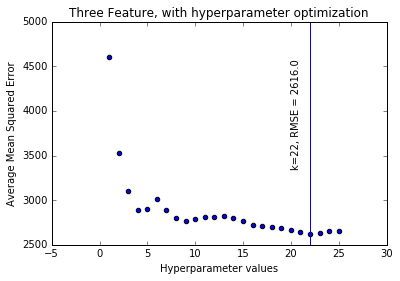

In [188]:
#testing for the best 3 features with hperparameter optimization

train_columns_3 = ['engine-size','highway-mpg','curb-weight']   
# three_feature = multiv_knn_train_test(train_cols =train_columns_3 , target_col='price', df = df_normalized)
# three_feature
avg_rmses = {}

for hp in range(1,26):
    avg_rmse = hyperparm_knn_train_test(train_cols =train_columns_3 , target_col='price', df = df_normalized, k_value=hp )
    avg_rmses[hp] = avg_rmse

#plotting the average mean squared error
lists = sorted(avg_rmses.items())
x, y = zip(*lists)
min_hp = min(avg_rmses, key = avg_rmses.get)
min_val = round(min(avg_rmses[i] for i,k in avg_rmses.items()))
plt.scatter(x,y)
plt.title('Three Feature, with hyperparameter optimization')
plt.xlabel('Hyperparameter values')
plt.ylabel('Average Mean Squared Error')
plt.axvline(min_hp)
plt.text(20,4500, 'k={}, RMSE = {}'.format(min_hp, min_val), rotation=90)
plt.show()



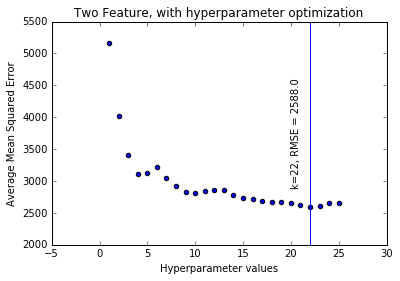

In [191]:
#testing for the best 2 features with hperparameter optimization

train_columns_2 = ['engine-size','highway-mpg']   
avg_rmses = {}
for hp in range(1,26):
    avg_rmse = hyperparm_knn_train_test(train_cols =train_columns_2 , target_col='price', df = df_normalized, k_value=hp )
    avg_rmses[hp] = avg_rmse

#plotting the average mean squared error
lists = sorted(avg_rmses.items())
x, y = zip(*lists)
min_hp = min(avg_rmses, key = avg_rmses.get)
min_val = round(min(avg_rmses[i] for i,k in avg_rmses.items()))
plt.scatter(x,y)
plt.title('Two Feature, with hyperparameter optimization')
plt.xlabel('Hyperparameter values')
plt.ylabel('Average Mean Squared Error')
plt.axvline(min_hp)
plt.text(20,4500, 'k={}, RMSE = {}'.format(min_hp, min_val), rotation=90)
plt.show()